<a href="https://colab.research.google.com/github/AdarshBT18/MyRep/blob/master/Feed_Forward_NeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from mpl_toolkits import mplot3d
import matplotlib.colors
import pandas as pd 
from sklearn.preprocessing import StandardScaler , MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , mean_squared_error , log_loss
from tqdm import tqdm_notebook
import time
from IPython.display import HTML
from sklearn.preprocessing import OneHotEncoder
from sklearn.datasets import make_blobs

In [2]:
class FF_Vectorised_MultiClass:

    def __init__(self , W1, W2):
        self.W1 = W1.copy()
        self.W2 = W2.copy()
        self.B1 = np.zeros((1,2))
        self.B2 = np.zeros((1,4))
    
    def sigmoid(self, X):
        return 1.0/(1.0 + np.exp(-X))
    
    def softmax(self, X):
        exps = np.exp(X)
        return exps / np.sum(exps, axis=1).reshape(-1,1)
    
    def forward_pass(self, X):
        self.A1 = np.matmul(X, self.W1) + self.B1
        self.H1 = self.sigmoid(self.A1)
        self.A2 = np.matmul(self.H1, self.W2) + self.B2
        self.H2 = self.softmax(self.A2)
        return self.H2
    
    def grad_sigmoid(self, X):
        return X*(1-X)
    
    def grad(self, X, Y):
        self.forward_pass(X)
        m = X.shape[0]

        self.dA2 = self.H2 - Y
        self.dW2 = np.matmul(self.H1.T, self.dA2) 
        self.dB2 = np.sum(self.dA2, axis=0).reshape(1, -1) 
        self.dH1 = np.matmul(self.dA2, self.W2.T) 
        self.dA1 = np.multiply(self.dH1, self.grad_sigmoid(self.H1))

        self.dW1 = np.matmul(X.T, self.dA1)
        self.dB1 = np.sum(self.dA1, axis=0).reshape(1, -1)
    
    def fit(self, X, Y, epochs=1, learning_rate=1, display_loss=False):
        
        if display_loss:
            loss = {}
        
        for i in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):
            self.grad(X, Y)

            m = X.shape[0]
            self.W2 -= learning_rate * (self.dW2/m)
            self.B2 -= learning_rate * (self.dB2/m)
            self.W1 -= learning_rate * (self.dW1/m)
            self.B1 -= learning_rate * (self.dB1/m)
            
            if display_loss:
                Y_pred = self.predict(X)
                loss[i] = log_loss(np.argmax(Y, axis=1), Y_pred)
        
        if display_loss:
            Values = np.array(list(loss.values())).astype(float)
            plt.plot(Values)
            plt.xlabel('Epochs')
            plt.ylabel('Log Loss')
            plt.show()
    
    def predict(self, X):
        Y_pred = self.forward_pass(X)
        return np.array(Y_pred).squeeze()

(2000, 2) (2000,)


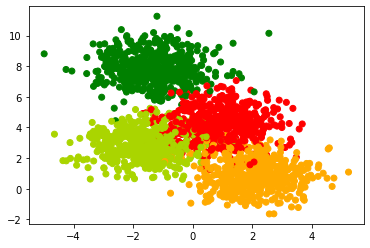

(1500, 2) (500, 2) (2000,)
(1500, 4) (500, 4)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:44: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


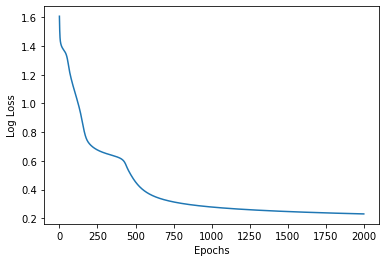

Time taken by model 1: 4.473363637924194
Model 1
Training accuracy 0.92
Validation accuracy 0.93


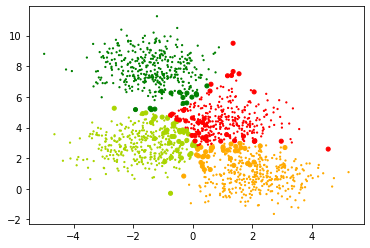

In [3]:
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red","yellow","green"])
np.random.seed(0)

data, labels = make_blobs(n_samples=2000, centers=4, n_features=2, random_state=0)
print(data.shape, labels.shape)
plt.scatter(data[:,0], data[:,1], c=labels, cmap=my_cmap)
plt.show()
labels_orig = labels

X_train, X_val, Y_train, Y_val = train_test_split(data, labels_orig, stratify=labels_orig, random_state=0)
print(X_train.shape, X_val.shape, labels_orig.shape)

enc = OneHotEncoder()
# 0 -> (1, 0, 0, 0), 1 -> (0, 1, 0, 0), 2 -> (0, 0, 1, 0), 3 -> (0, 0, 0, 1)
y_OH_train = enc.fit_transform(np.expand_dims(Y_train,1)).toarray()
y_OH_val = enc.fit_transform(np.expand_dims(Y_val,1)).toarray()
print(y_OH_train.shape, y_OH_val.shape)

W1 = np.random.randn(2,2)
W2 = np.random.randn(2,4)

models_init = [FF_Vectorised_MultiClass(W1,W2)]
models = []
for idx, model in enumerate(models_init, start=1):
    tic = time.time()
    ffsn_multi_specific = model
    ffsn_multi_specific.fit(X_train,y_OH_train,epochs=2000,learning_rate=0.5,display_loss=True)
    models.append(ffsn_multi_specific)
    toc = time.time()
    print("Time taken by model {}: {}".format(idx, toc-tic))

for idx, model in enumerate(models, start=1):
  Y_pred_train = model.predict(X_train)
  Y_pred_train = np.argmax(Y_pred_train,1)

  Y_pred_val = model.predict(X_val)
  Y_pred_val = np.argmax(Y_pred_val,1)

  accuracy_train = accuracy_score(Y_pred_train, Y_train)
  accuracy_val = accuracy_score(Y_pred_val, Y_val)
  
  print("Model {}".format(idx))
  print("Training accuracy", round(accuracy_train, 2))
  print("Validation accuracy", round(accuracy_val, 2))

plt.scatter(X_train[:,0], X_train[:,1], c=Y_pred_train, cmap=my_cmap, s=15*(np.abs(np.sign(Y_pred_train-Y_train))+.1))
plt.show()